In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.svm import SVR

In [2]:
data = pd.read_csv("AAPL.csv.2")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...,...
10741,2023-07-24,193.410004,194.910004,192.250000,192.750000,192.750000,45377800
10742,2023-07-25,193.330002,194.440002,192.919998,193.619995,193.619995,37283200
10743,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
10744,2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200


In [3]:
data = data[["Date", "Close"]]
data

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10741,2023-07-24,192.750000
10742,2023-07-25,193.619995
10743,2023-07-26,194.500000
10744,2023-07-27,193.220001


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10746 entries, 0 to 10745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10746 non-null  object 
 1   Close   10746 non-null  float64
dtypes: float64(1), object(1)
memory usage: 168.0+ KB


In [5]:
data.head()

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862


In [6]:
data.describe()

,Close
count,10746.000000
mean,18.453617
std,38.903269
min,0.049107
25%,0.292009
50%,0.497768
75%,18.025089
max,195.830002


In [7]:
data.isnull().sum()

Date     0
Close    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
import matplotlib.pyplot as plt

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

C:\Users\jpilo\AppData\Local\Temp\ipykernel_4904\889507750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


In [11]:
data_grouped = data.resample('Y').mean()

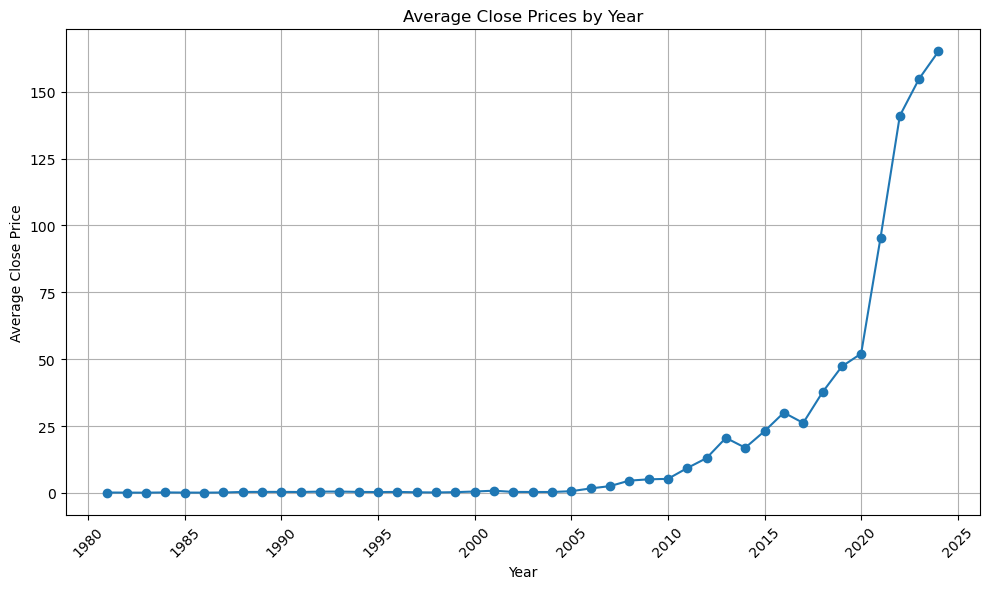

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data_grouped.index, data_grouped['Close'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.title('Average Close Prices by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()

In [15]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [16]:
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(len(data)-lookback-1):
        X.append(data[i:(i+lookback), 0])
        y.append(data[i+lookback, 0])
    return np.array(X), np.array(y)

In [17]:
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

In [18]:
lookback = 60
model = Sequential()
model.add(LSTM(50, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
X_train, y_train = create_sequences(train_data, lookback)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
267/267 [==============================] - 22s 52ms/step - loss: 1.5497e-05
Epoch 2/10
267/267 [==============================] - 15s 55ms/step - loss: 1.9771e-06
Epoch 3/10
267/267 [==============================] - 16s 60ms/step - loss: 1.9548e-06
Epoch 4/10
267/267 [==============================] - 14s 51ms/step - loss: 1.8324e-06
Epoch 5/10
267/267 [==============================] - 16s 61ms/step - loss: 1.7109e-06
Epoch 6/10
267/267 [==============================] - 16s 59ms/step - loss: 1.5590e-06
Epoch 7/10
267/267 [==============================] - 15s 55ms/step - loss: 1.2554e-06
Epoch 8/10
267/267 [==============================] - 14s 52ms/step - loss: 1.2960e-06
Epoch 9/10
267/267 [==============================] - 17s 63ms/step - loss: 1.3168e-06
Epoch 10/10
267/267 [==============================] - 16s 58ms/step - loss: 1.2325e-06


In [20]:
X_test, y_test = create_sequences(test_data, lookback)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

y_pred = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

rmse = np.sqrt(np.mean((y_pred - y_test)**2))

66/66 [==============================] - 4s 23ms/step


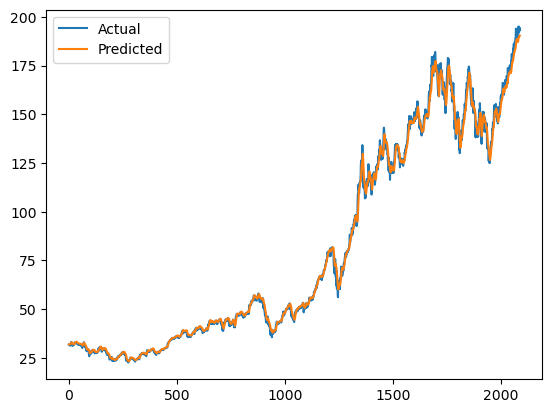

In [21]:
plt.plot(y_test.reshape(-1), label='Actual')
plt.plot(y_pred.reshape(-1), label='Predicted')
plt.legend()
plt.show()